### Workout Stats
Working with a .csv with some workout numbers I exported from the Coros app.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

run = pd.read_csv("run-raypeter.csv")

In [2]:
# get rid of the "Summary thing" at the end
laps = 0
for s in run["Split"]:
    if s != "Summary":
        laps += 1
run = run.iloc[:laps]

**What was my best split? In terms of calories burnt and avg moving paces.**

In [3]:
# convert that fucker to datetime boi
run["Avg Moving Paces"] = pd.to_datetime(run["Avg Moving Paces"])

run["AMP Minutes"] = (run["Avg Moving Paces"].dt.minute) + (run["Avg Moving Paces"].dt.second / 60)
run["Score"] = run["Calories"] / run["AMP Minutes"]

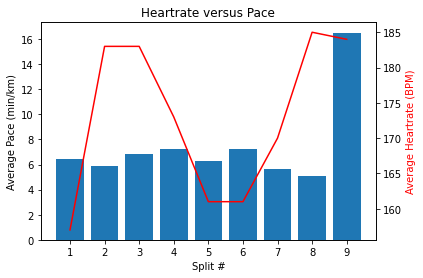

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(run["Split"], run["AMP Minutes"])
ax2.plot(run["Split"], run["Avg HR"], color="r")

ax1.set_xlabel("Split #")
ax1.set_ylabel("Average Pace (min/km)")
ax2.set_ylabel("Average Heartrate (BPM)", color="r")
plt.title("Heartrate versus Pace")

plt.show()